In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Task distribution

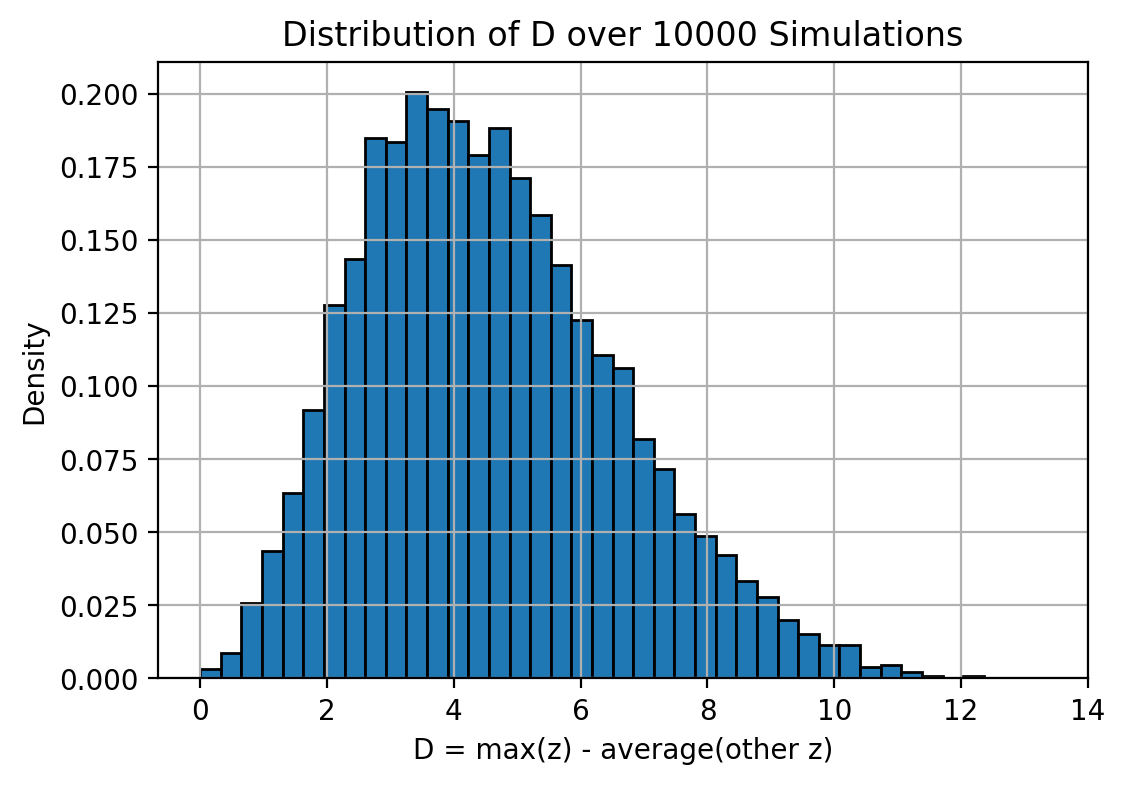

In [2]:
# Set seed for reproducibility
# np.random.seed(42)

# Parameters
n_sim = 10000
x_range = np.arange(-4, 5)

# Simulation
D_values = []
for _ in range(n_sim):
    # Randomly sample x1 to x6
    x = np.random.choice(x_range, size=6)
    x1, x2, x3, x4, x5, x6 = x

    # Compute z values
    z1 = x1 + x3
    z2 = x1 + x4
    z3 = x2 + x5
    z4 = x2 + x6
    z = [z1, z2, z3, z4]

    # Compute D = max(z) - average(other z)
    max_z = max(z)
    sum_z = sum(z)
    D = (4 * max_z - sum_z) / 3
    D_values.append(D)

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(D_values, bins=41, edgecolor='black', density=True)
plt.xlabel("D = max(z) - average(other z)")
plt.ylabel("Density")
plt.title("Distribution of D over 10000 Simulations")
plt.grid(True)
plt.show()

In [3]:
with open('data/Tree2_v3.json', 'r') as f:
# with open('sub/w0c70a81.json', 'r') as f:
# with open("data/Tree2_v3.json") as f:
    trials = [json.loads(line) for line in f]

# with open("data/Tree2_v3.json") as f:
#     trials = json.load(f)

df = pd.DataFrame(trials)
df

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6,3.0
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3,1.0
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10,5.0
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6,6.0
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4584,w18b16aa,"[-4, -1, 5, 2]","[-4, 2]","[0, 3, 3, 0]",2,3,1915,877,2792,6.0,6,3.0
4585,w18b16aa,"[-2, -1, 0, 1]","[-1, -3]","[-1, 0, 3, 4]",1,2,2248,1265,3513,2.0,2,1.0
4586,w18b16aa,"[5, 1, -4, -3]","[2, 0]","[3, -1, -4, -3]",1,1,2065,557,2622,7.0,7,4.0
4587,w18b16aa,"[0, 4, -4, -2]","[4, -2]","[-4, 0, -2, 0]",1,2,2630,917,3547,6.0,6,4.0


In [4]:
def subtree_vals(path_value, choice1):

    if choice1 == 1:
        return path_value[0:2]
    else:
        return path_value[2:4]

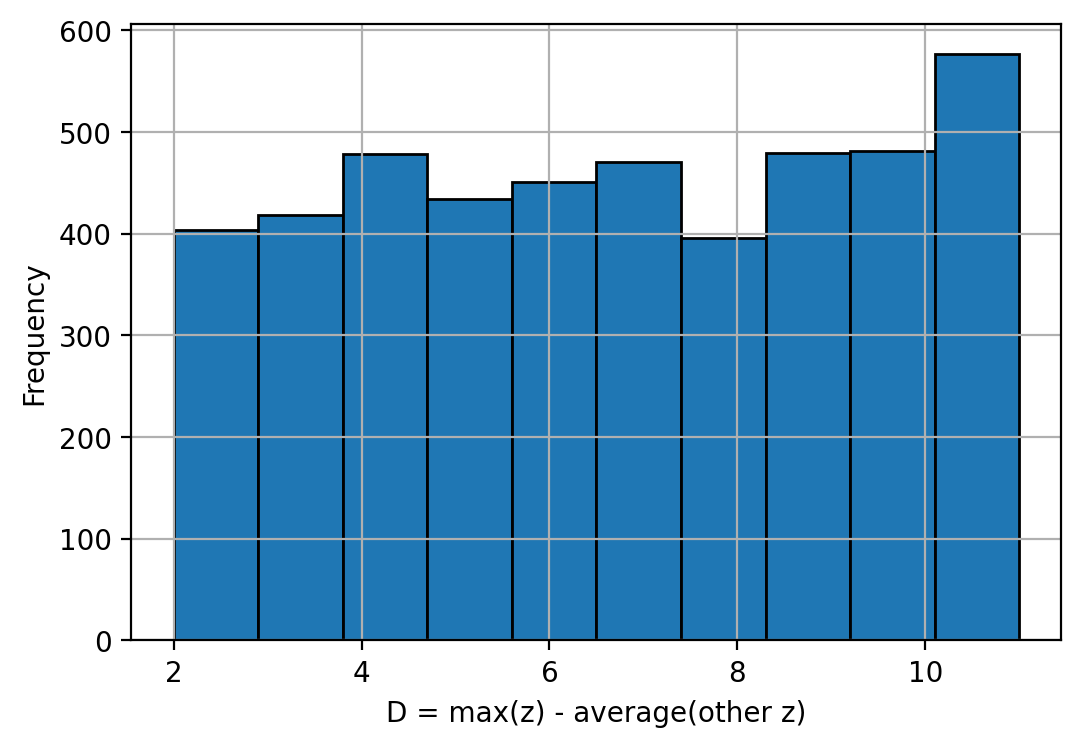

In [5]:
plt.figure(figsize=(6, 4))
plt.hist(df['difficulty'], edgecolor='black', density=False)
plt.xlabel("D = max(z) - average(other z)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [6]:
# first stage accuracy

df['best_path_idx'] = df['rewards'].apply(lambda v: int(np.argmax(v)))
df['correct1'] = df.apply(
    lambda r: (r['best_path_idx'] < 2 and r['choice1'] == 1)
              or (r['best_path_idx'] >= 2 and r['choice1'] == 2),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6,3.0,3,True
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3,1.0,0,False
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10,5.0,1,True
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6,6.0,2,True
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11,4.0,1,True


In [7]:
# 5. Second‐stage correctness:
#    “Selected the higher‐rated item in that subtree”
df['correct2'] = df.apply(
    lambda r: (
        r['value2'][r['choice2'] - 1]
        == max(subtree_vals(r['value2'], r['choice1']))
    ),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1,correct2
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6,3.0,3,True,True
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3,1.0,0,False,True
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10,5.0,1,True,True
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6,6.0,2,True,True
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11,4.0,1,True,True


In [8]:
# 6. Overall correctness
df['correct_all'] = df['correct1'] & df['correct2']
df.tail()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1,correct2,correct_all
4584,w18b16aa,"[-4, -1, 5, 2]","[-4, 2]","[0, 3, 3, 0]",2,3,1915,877,2792,6.0,6,3.0,2,True,True,True
4585,w18b16aa,"[-2, -1, 0, 1]","[-1, -3]","[-1, 0, 3, 4]",1,2,2248,1265,3513,2.0,2,1.0,3,False,True,False
4586,w18b16aa,"[5, 1, -4, -3]","[2, 0]","[3, -1, -4, -3]",1,1,2065,557,2622,7.0,7,4.0,0,True,True,True
4587,w18b16aa,"[0, 4, -4, -2]","[4, -2]","[-4, 0, -2, 0]",1,2,2630,917,3547,6.0,6,4.0,1,True,True,True
4588,w18b16aa,"[-2, 0, -6, -4]","[1, -2]","[-3, -1, -4, -2]",1,2,2043,1360,3403,4.0,4,2.0,1,True,True,True


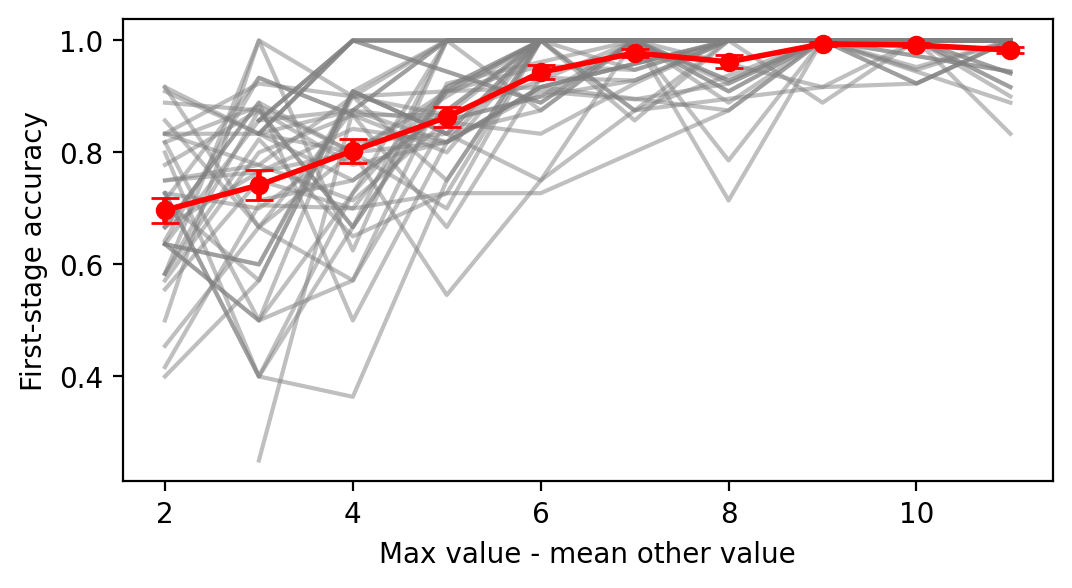

In [9]:
per1 = (
    df.groupby(['wid','diff1'])['correct1']
      .mean()
      .reset_index(name='accuracy1')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby('diff1')['accuracy1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in per1.groupby('wid'):
    ax.plot(grp['diff1'], grp['accuracy1'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff1'],
    stats['mean'],
    yerr=stats['sem'],
    color='red',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage accuracy')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.show()

In [10]:
print(np.random.randn()*0.1)

-0.1181282964058448


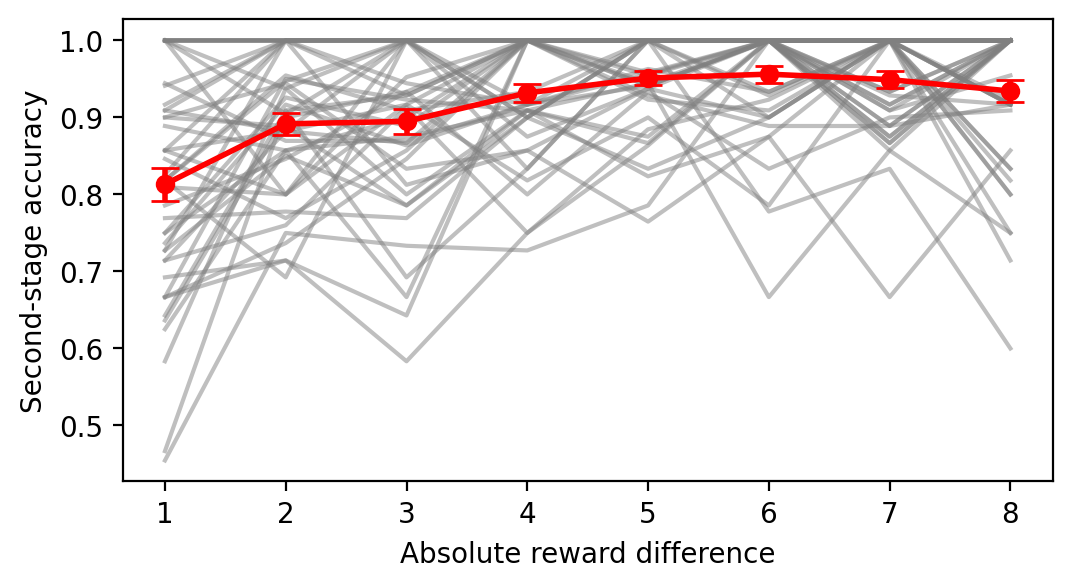

In [11]:
# b) Second‐stage accuracy by diff2
per2 = (
    df.groupby(['wid','diff2'])['correct2']
      .mean()
      .reset_index(name='accuracy2')
)

# 2. Compute group‐level mean and SEM
stats = (
    per2.groupby('diff2')['accuracy2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in per2.groupby('wid'):
    ax.plot(grp['diff2'], grp['accuracy2'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff2'],
    stats['mean'],
    yerr=stats['sem'],
    color='red',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage accuracy')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.show()

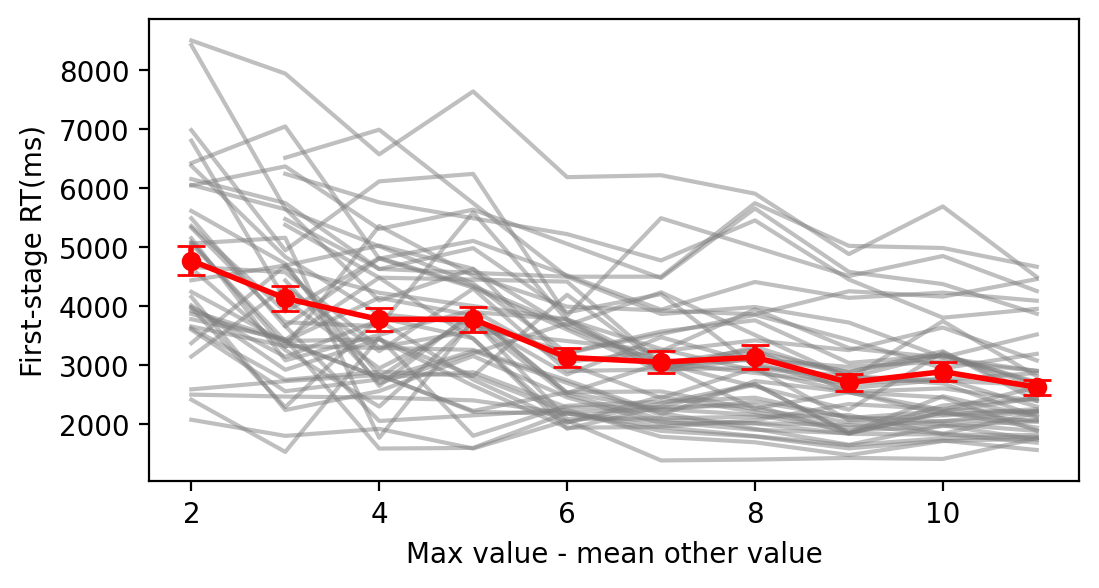

In [12]:
# c) First‐stage RT (mean) for correct trials by diff1
rt1 = (
    df[df['correct1']]
      .groupby(['wid','diff1'])['rt1']
      .mean()
      .reset_index(name='mean_rt1')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt1.groupby('diff1')['mean_rt1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in rt1.groupby('wid'):
    ax.plot(grp['diff1'], grp['mean_rt1'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff1'],
    stats['mean'],
    yerr=stats['sem'],
    color='red',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage RT(ms)')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
# plt.ylim(0, 9000)
plt.show()

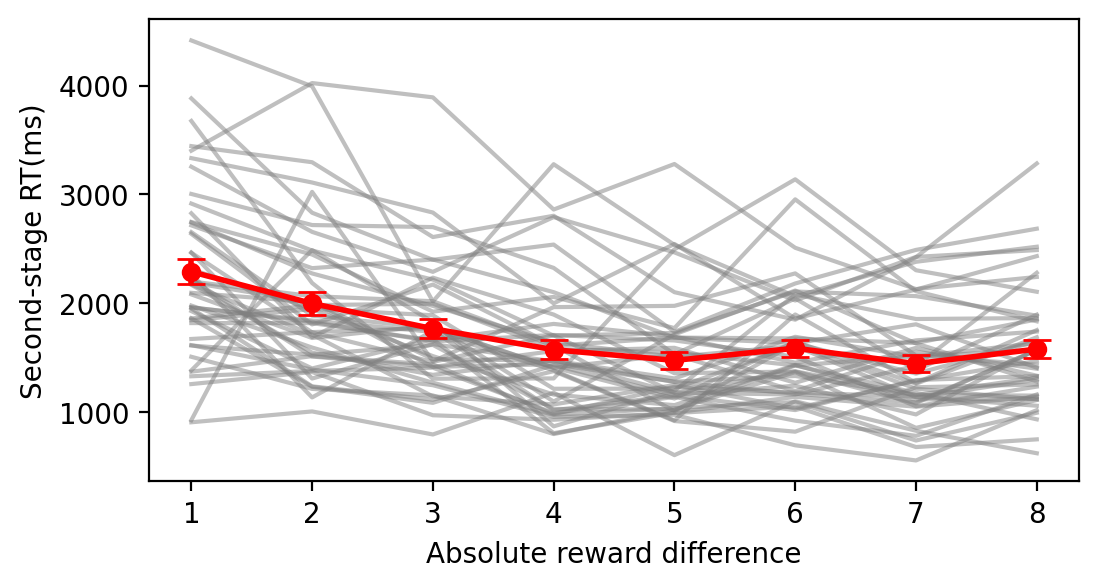

In [13]:
# d) Second‐stage RT (mean) for correct trials by diff2
rt2 = (
    df[df['correct2']]
      .groupby(['wid','diff2'])['rt2']
      .mean()
      .reset_index(name='mean_rt2')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt2.groupby('diff2')['mean_rt2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in rt2.groupby('wid'):
    ax.plot(grp['diff2'], grp['mean_rt2'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff2'],
    stats['mean'],
    yerr=stats['sem'],
    color='red',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage RT(ms)')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
# plt.ylim(0, 4000)
plt.show()

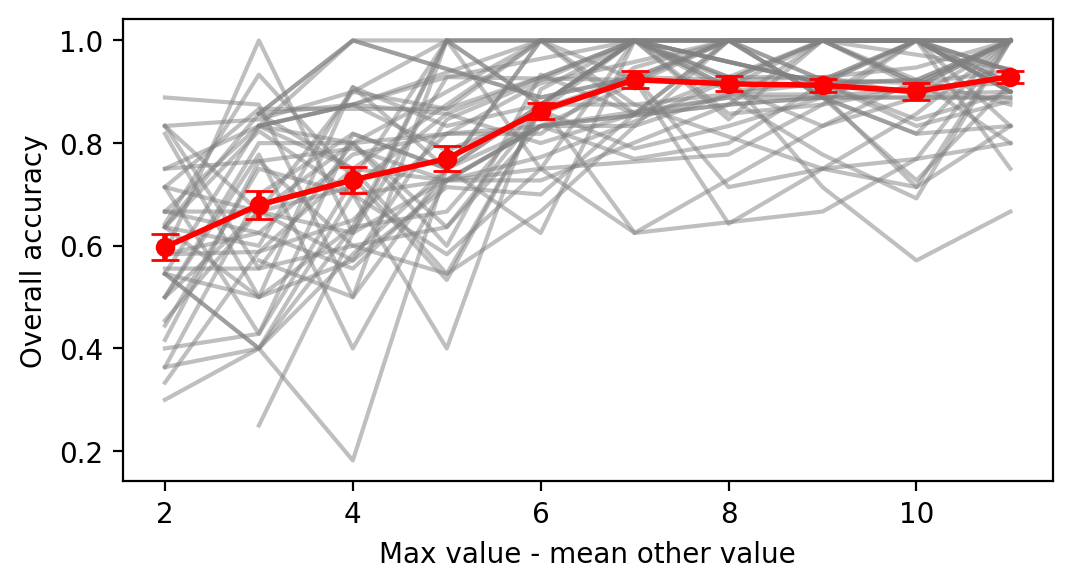

In [14]:
per1 = (
    df.groupby(['wid','diff1'])['correct_all']
      .mean()
      .reset_index(name='accuracy')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby('diff1')['accuracy']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for _, grp in per1.groupby('wid'):
    ax.plot(grp['diff1'], grp['accuracy'], color='gray', alpha=0.5)

# Overlay group‐level mean ± SEM in black
ax.errorbar(
    stats['diff1'],
    stats['mean'],
    yerr=stats['sem'],
    color='red',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('Overall accuracy')
# ax.set_title('First-Stage Accuracy vs. diff1\n'
#              '(Individual subjects: gray; Group mean ± SEM: black)')
plt.show()

In [15]:
def subtree_relation_code(rewards):
    # get indices of rewards sorted descending: [best, 2nd, 3rd, worst]
    idx_desc = np.argsort(rewards)[::-1]
    best, second, third, worst = idx_desc
    # define which subtree each index lives in (0 = left [0,1], 1 = right [2,3])
    subtree = lambda i: 0 if i < 2 else 1

    if subtree(best) == subtree(second):
        return 1
    elif subtree(best) == subtree(third):
        return 2
    elif subtree(best) == subtree(worst):
        return 3
    else:
        return np.nan

# Add the new column to your DataFrame
df['subtree_relation'] = df['rewards'].apply(subtree_relation_code)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,best_path_idx,correct1,correct2,correct_all,subtree_relation
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6,3.0,3,True,True,True,1
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3,1.0,0,False,True,False,1
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10,5.0,1,True,True,True,1
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6,6.0,2,True,True,True,2
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11,4.0,1,True,True,True,1


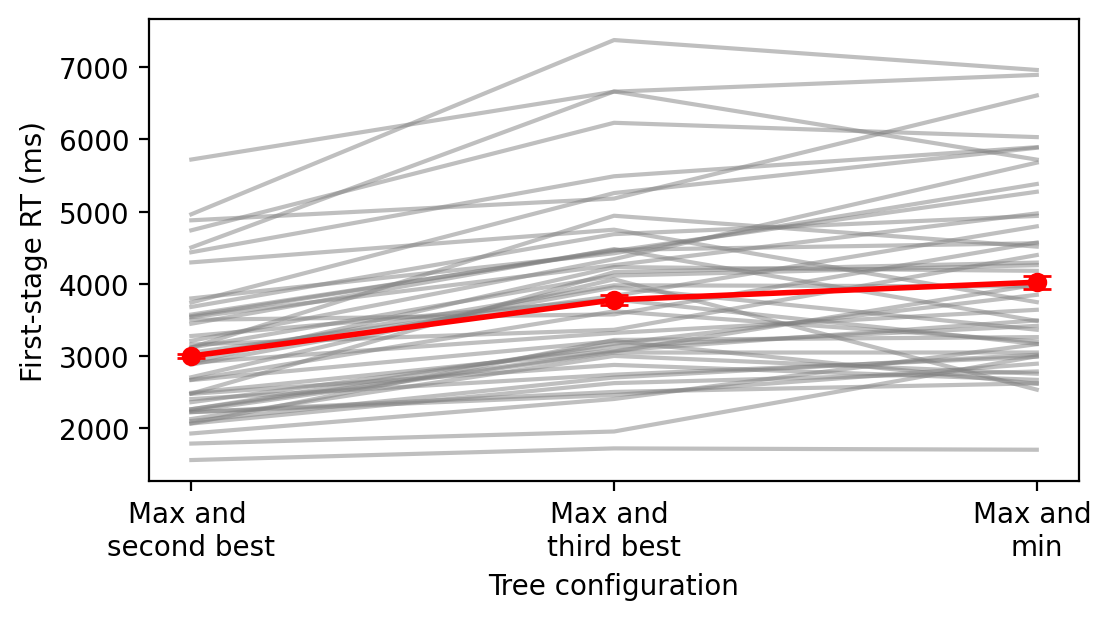

In [16]:
# plot the first stage RT by subtree relation

# Calculate mean and SEM of RT1 for each subtree relation
stats = df.groupby('subtree_relation').agg({
    'rt1': ['mean', 'sem']
}).reset_index()
stats.columns = ['subtree_relation', 'mean', 'sem']

# Create the plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot individual subjects in gray
for _, grp in df.groupby('wid'):
    rt_means = grp.groupby('subtree_relation')['rt1'].mean()
    ax.plot(rt_means.index, rt_means.values, color='gray', alpha=0.5)

# Overlay group-level mean ± SEM in blue
ax.errorbar(
    stats['subtree_relation'],
    stats['mean'], 
    yerr=stats['sem'],
    color='red',
    marker='o',
    linewidth=2,
    capsize=5
)

ax.set_xlabel('Tree configuration')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Max and \nsecond best', 'Max and \nthird best', 'Max and \nmin'])
ax.set_ylabel('First-stage RT (ms)')
plt.show()


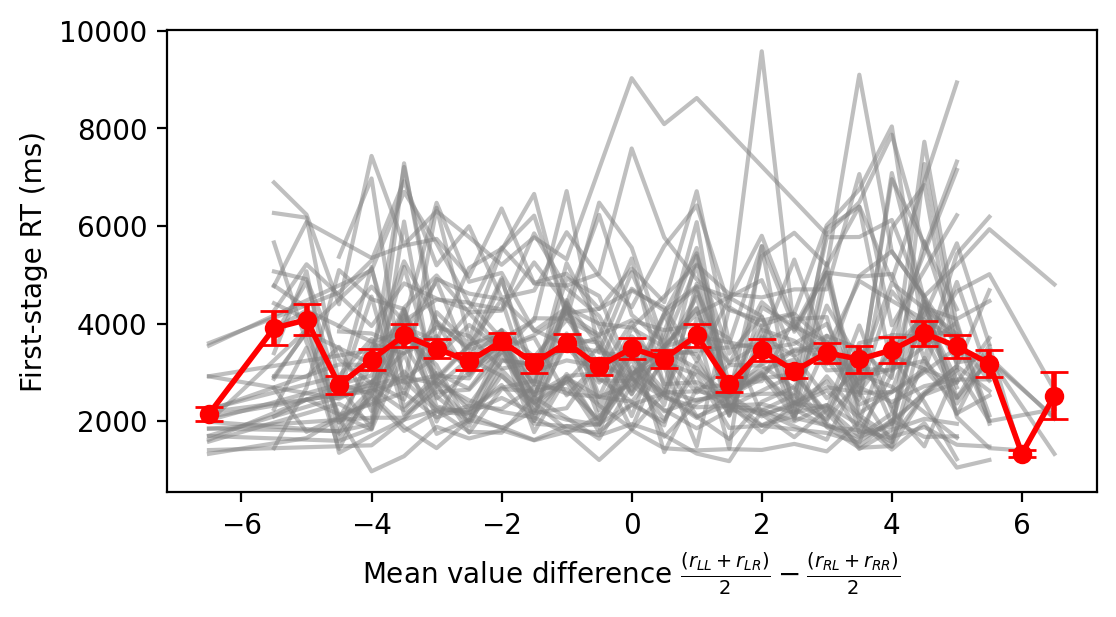

In [27]:
# Extract value differences from value2 column
def get_mean_diff(value_list):
    return (value_list[0] + value_list[1])/2 - (value_list[2] + value_list[3])/2

def get_max_diff(value_list):
    return max(value_list[0], value_list[1]) - max(value_list[2], value_list[3])

# Calculate value differences
df['mean_diff'] = df['value2'].apply(get_mean_diff)
df['max_diff'] = df['value2'].apply(get_max_diff)

# Create figure 1: RT vs mean difference
fig1, ax1 = plt.subplots(figsize=(6, 3))

# Calculate participant-level means
participant_means = []
for _, grp in df.groupby('wid'):
    # Get mean RT for each unique mean_diff value
    means = grp.groupby('mean_diff')['rt1'].mean()
    participant_means.append(means)
    # Plot individual participant data in gray
    ax1.plot(means.index, means.values, color='gray', alpha=0.5)

# Calculate overall mean and SEM across participants
all_means = pd.concat(participant_means, axis=1)
mean = all_means.mean(axis=1)
sem = all_means.sem(axis=1)

# Sort by mean_diff values (index)
mean = mean.sort_index()
sem = sem.loc[mean.index]  # ensure SEM is aligned with sorted mean

# Plot group-level mean ± SEM
ax1.errorbar(mean.index, mean.values, yerr=sem, 
             color='red', marker='o', linewidth=2, capsize=5)

# using latex
ax1.set_xlabel('Mean value difference $\\frac{(r_{LL}+r_{LR})}{2}-\\frac{(r_{RL}+r_{RR})}{2}$')
ax1.set_ylabel('First-stage RT (ms)')

# set the x axis range from -1 to 1
# ax1.set_xlim(-6.1, 6.1)

plt.show()

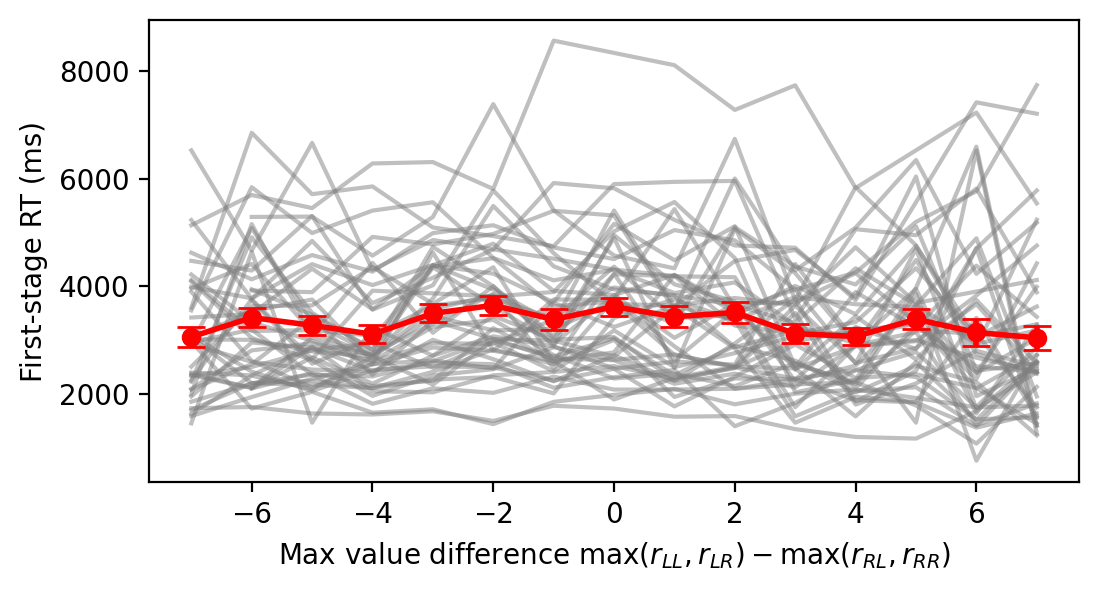

In [28]:


# Create figure 2: RT vs max difference
fig2, ax2 = plt.subplots(figsize=(6, 3))

# Calculate participant-level means
participant_means = []
for _, grp in df.groupby('wid'):
    # Get mean RT for each unique max_diff value
    means = grp.groupby('max_diff')['rt1'].mean()
    participant_means.append(means)
    # Plot individual participant data in gray
    ax2.plot(means.index, means.values, color='gray', alpha=0.5)

# Calculate overall mean and SEM across participants
all_means = pd.concat(participant_means, axis=1)
mean = all_means.mean(axis=1)
sem = all_means.sem(axis=1)

# Plot group-level mean ± SEM
ax2.errorbar(mean.index, mean.values, yerr=sem,
             color='red', marker='o', linewidth=2, capsize=5)

# using latex
ax2.set_xlabel('Max value difference $\\max(r_{LL},r_{LR})-\\max(r_{RL},r_{RR})$')
ax2.set_ylabel('First-stage RT (ms)')
plt.show()
